# Task1 , Bikes_Rental

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('bikes.csv')
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 935.6+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
holiday,10030.0,0.029113,0.168131,0.00,0.0000,0.000,0.0000,1.0000
workingday,9388.0,0.678206,0.467189,0.00,0.0000,1.000,1.0000,1.0000
temp,8104.0,20.317665,7.818568,0.82,13.9400,20.500,26.2400,41.0000
humidity,7462.0,61.790673,19.262084,0.00,47.0000,62.000,77.0000,100.0000
windspeed,6820.0,12.708806,8.131154,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
rented_bikes_count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


### 1. Make Profit Feature.

    - Each registerd user rent bike for 5 USD/hour.
    - Casual user rent bike for 20 USD/hour.
    - Taxes 0.14%.
    - Maintance 1500/year.


In [8]:
df['prof_hr']=(df['casual']*5*0.86)+(df['registered']*20*0.86)
df['year']=df['datetime'].apply(lambda x : x.split('-')[0])
df.groupby('year').sum()['prof_hr']-1500

year
2011    11438499.5
2012    19370146.2
Name: prof_hr, dtype: float64

### 2. Distribution rental_bikes_count & profit.

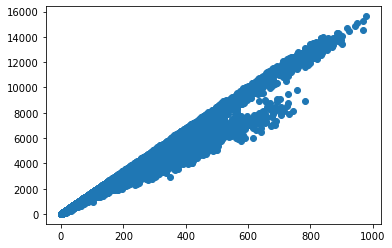

In [9]:
plt.scatter(df['rented_bikes_count'],df['prof_hr'])
plt.show()

In [10]:
df[['rented_bikes_count','prof_hr']].corr()

,rented_bikes_count,prof_hr
rented_bikes_count,1.000000,0.985102
prof_hr,0.985102,1.000000


### 3. Profit for each day.

In [11]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,prof_hr,year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,236.5,2011
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,584.8,2011
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,485.9,2011
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,184.9,2011
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,17.2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,5688.9,2012
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,4016.2,2012
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,2838.0,2012
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,2064.0,2012


In [12]:
df['day']=df['datetime'].apply( lambda x : x.split()[0])
df.groupby('day').sum()['prof_hr']

day
2011-01-01    12672.1
2011-01-02    12087.3
2011-01-03    21654.8
2011-01-04    25473.2
2011-01-05    26462.2
               ...   
2012-12-15    76914.1
2012-12-16    58179.0
2012-12-17    76127.2
2012-12-18    89994.7
2012-12-19    86296.7
Name: prof_hr, Length: 456, dtype: float64

### 4. Which season that has more registeration & profit.

In [13]:
df.groupby('season').sum()['registered']

season
Fall      488252
Spring    265322
Summer    446991
Winter    457276
Name: registered, dtype: int64

In [14]:
df.groupby('season').sum()['prof_hr']

season
Fall      9000502.0
Spring    4737503.5
Summer    8231287.9
Winter    8195193.7
Name: prof_hr, dtype: float64

### 5. Which weather condition that has more registeration & profit.

In [15]:
df.groupby('weather').sum()['registered']

weather
Clear    951449
Mist     336229
Rainy     70204
Snowy       158
Name: registered, dtype: int64

In [16]:
df.groupby('weather').sum()['prof_hr']

weather
Clear    17358037.9
Mist      6083119.7
Rainy     1259470.0
Snowy        2743.4
Name: prof_hr, dtype: float64

###  6. Correlation between profit & bikes count with all features.

In [17]:
df.corr()[['prof_hr','rented_bikes_count']].transpose()

,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,prof_hr
prof_hr,-0.016777,0.088375,0.339291,-0.282667,0.092096,0.555721,0.997634,0.985102,1.000000
rented_bikes_count,-0.005827,0.010940,0.391867,-0.317282,0.097747,0.690414,0.970948,1.000000,0.985102


### 7. Rentals during rush hours (7-9 am & 3-5 pm).

In [19]:

df['rent_hr']=df['datetime'].apply(lambda x : int(x.split()[1][0:2]))
df[(df['rent_hr'].between(7,9,inclusive=True)) | (df['rent_hr'].between(15,17,inclusive=True))].groupby('rent_hr').sum()['rented_bikes_count']


C:\Users\AHMED_~1\AppData\Local\Temp/ipykernel_6796/3214161682.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df[(df['rent_hr'].between(7,9,inclusive=True)) | (df['rent_hr'].between(15,17,inclusive=True))].groupby('rent_hr').sum()['rented_bikes_count']


rent_hr
7      96968
8     165060
9     100910
15    115960
16    144266
17    213757
Name: rented_bikes_count, dtype: int64

### 7. Rentals during workday & holiday.

In [20]:
df[df['holiday']>0]['rented_bikes_count'].sum()

54128

In [21]:
df[df['workingday']>0]['rented_bikes_count'].sum()

1226368

### 8. Registered or casual is more.

In [22]:
df[['casual','registered']].sum()

casual         392135
registered    1693341
dtype: int64

###  9. What is the average of bikes would be registered during the week.

In [23]:
df['formatted_date']= pd.to_datetime(df['datetime'])
df['week_of_year'] = df.formatted_date.apply(lambda x: x.weekofyear)
df.groupby('week_of_year').mean()['rented_bikes_count'].mean()

190.29099156657995

### 10. Schools (9-12) & (2-6) profit.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  object        
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  prof_hr             10886 non-null  float64       
 12  year                10886 non-null  object        
 13  day                 10886 non-null  object    

In [37]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,prof_hr,year,day,rent_hr,formatted_date,week_of_year
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,236.5,2011,2011-01-01,0,2011-01-01 00:00:00,52
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,584.8,2011,2011-01-01,1,2011-01-01 01:00:00,52
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,485.9,2011,2011-01-01,2,2011-01-01 02:00:00,52
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,184.9,2011,2011-01-01,3,2011-01-01 03:00:00,52
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,17.2,2011,2011-01-01,4,2011-01-01 04:00:00,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,5688.9,2012,2012-12-19,19,2012-12-19 19:00:00,51
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,4016.2,2012,2012-12-19,20,2012-12-19 20:00:00,51
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,2838.0,2012,2012-12-19,21,2012-12-19 21:00:00,51
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,2064.0,2012,2012-12-19,22,2012-12-19 22:00:00,51


In [44]:
def check_day (x):
    if '-12-09' in x :
        return True
    elif '-06-02' in x:
        return True
    else : 
        return False
    
df[df['day'].apply(check_day)].groupby('day').sum()['prof_hr']

day
2011-06-02     75955.2
2011-12-09     58897.1
2012-06-02    103608.5
2012-12-09     49832.7
Name: prof_hr, dtype: float64

### 11. Profit in 2011 & saturdays & season fall

In [56]:
df['day_of_week'] = df['formatted_date'].dt.weekday 
df[(df['year']=='2011')&(df['season']=='Fall')&(df['day_of_week']==5)]['prof_hr'].sum()

472883.9

# Task2 , Loan_Data

In [58]:
df=pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 1.No. of males vs no. of females 

In [59]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

### 2.averge of applicant income for males and females

In [61]:
df.groupby('Gender')['ApplicantIncome'].mean()

Gender
Female    4643.473214
Male      5446.460123
Name: ApplicantIncome, dtype: float64

### 3. The maximum loan amount for gradute applicants

In [62]:
df[df['Education']=='Graduate']['LoanAmount'].max()

700.0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 4. How many male applicants that have 2 or more dependents

In [77]:
df[(df['Gender']=='Male')& ((df['Dependents'] =='2')|(df['Dependents'] =='+3'))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y


### 5.How many no.s of Loans  across the Loan amount Term and the Education 

In [90]:
pd.pivot_table(df,index=['Education'], columns=['Loan_Amount_Term'],values=['LoanAmount'],aggfunc='count')

LoanAmount                                                   \
Loan_Amount_Term      12.0  36.0  60.0  84.0  120.0 180.0 240.0 300.0  360.0   
Education                                                                      
Graduate                1.0   1.0   1.0   4.0   2.0  28.0   2.0  10.0  397.0   
Not Graduate            NaN   1.0   1.0   NaN   1.0  14.0   1.0   3.0   96.0   

                        
Loan_Amount_Term 480.0  
Education               
Graduate          11.0  
Not Graduate       4.0